Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


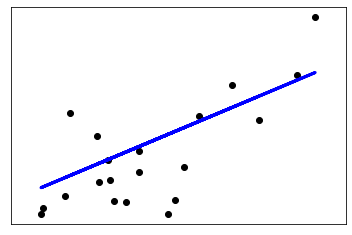

Coefficients: 
 [458.48859467]
Mean squared error: 3604.27
Variance score: 0.25


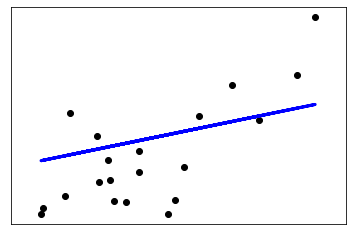

Coefficients: 
 [496.66920971]
Mean squared error: 3482.77
Variance score: 0.28


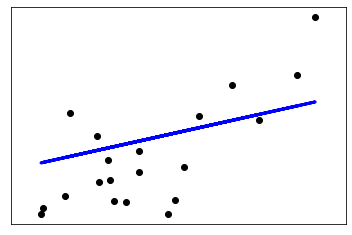

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object

regr1 = linear_model.LinearRegression()
regr1.fit(diabetes_X_train, diabetes_y_train)

regr2 = linear_model.Ridge()
regr2.fit(diabetes_X_train, diabetes_y_train)

regr3 = linear_model.Lasso()
regr3.fit(diabetes_X_train, diabetes_y_train)

for  regr in [regr1, regr2, regr3 ]:
    
    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()